In [ ]:
# SHAYAN HASSAN ABBASI
# 01-134212-167
# BS(CS)-7B

In [ ]:
# TASK no. 01.

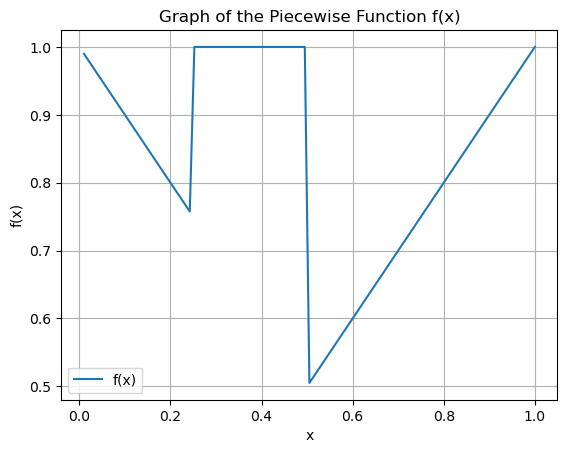

In [16]:
# Part(a)
# Draw a graph for f(x) to show its influence on image intensities.

import cv2
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    if 0 < x <= 0.25:
        return 1 - x
    elif 0.25 < x <= 0.5:
        return 1
    elif x > 0.5:
        return x

xValues = np.linspace(0, 1, 100)
yValues = [f(x) for x in xValues]

plt.plot(xValues, yValues, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of the Piecewise Function f(x)')
plt.grid(True)
plt.legend()
plt.show()

(-0.5, 722.5, 359.5, -0.5)

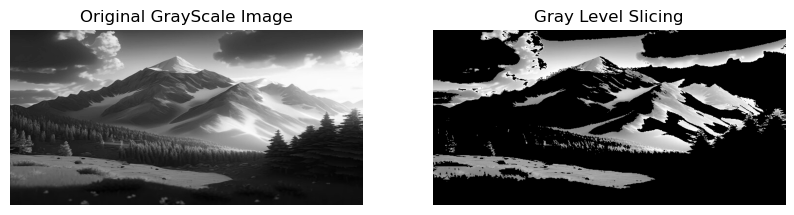

In [17]:
# Part(b)
# Write a Python program to implement f(x) on an input image. Also, show your result after transformation.

image = cv2.imread('3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh_low = 100
thresh_high = 200
thresh_img = cv2.inRange(image, thresh_low, thresh_high)
graySlicedImage = cv2.bitwise_and(image, image, mask = thresh_img)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title('Original GrayScale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(graySlicedImage, cmap = 'gray')
plt.title('Gray Level Slicing')
plt.axis('off')

In [ ]:
# TASK no. 02.

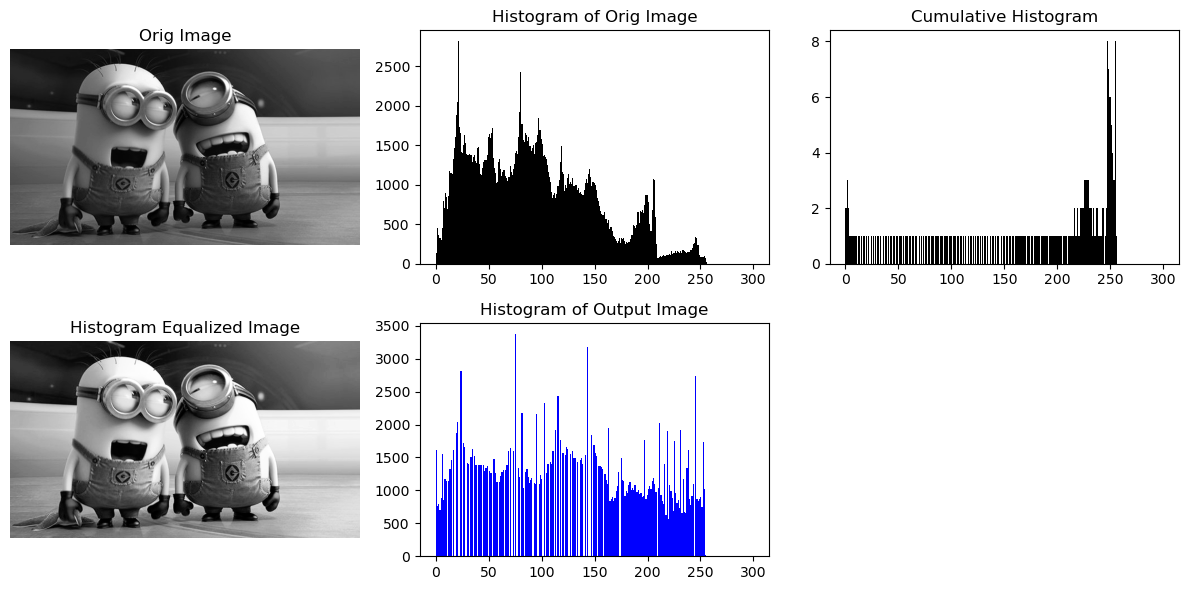

In [18]:
# Write a function named ‘myhist_equ’ to MANUALLY equalize histogram of an image and map corresponding results.

def myhist_equ(image):
    r, c = image.shape
    
    h = np.zeros(256, dtype = int)
    for i in range(r):
        for j in range(c):
            h[image[i, j]] += 1

    cum_h = np.zeros(256, dtype = float)
    cum_h[0] = h[0]
    for k in range(1, 256):
        cum_h[k] = cum_h[k - 1] + h[k]
    
    cum_h = np.floor((cum_h / (r * c)) * 255).astype(np.uint8)
    out_image = np.zeros_like(image)
    for i in range(r):
        for j in range(c):
            out_image[i, j] = cum_h[image[i, j]]
                
    plt.figure(figsize = (12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Orig Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.hist(image.flatten(), bins = 300, range = [0, 300], color = 'black')
    plt.title('Histogram of Orig Image')

    plt.subplot(2, 3, 3)
    plt.hist(cum_h, bins = 300, range = [0, 300], color = 'black')
    plt.title('Cumulative Histogram')
    
    plt.subplot(2, 3, 4)
    plt.imshow(out_image, cmap = 'gray')
    plt.title('Histogram Equalized Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.hist(out_image.flatten(), bins = 256, range = [0, 300], color = 'blue')
    plt.title('Histogram of Output Image')
    plt.tight_layout()
    plt.show()

image = cv2.imread('1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
myhist_equ(image)

In [ ]:
# TASK no. 03.

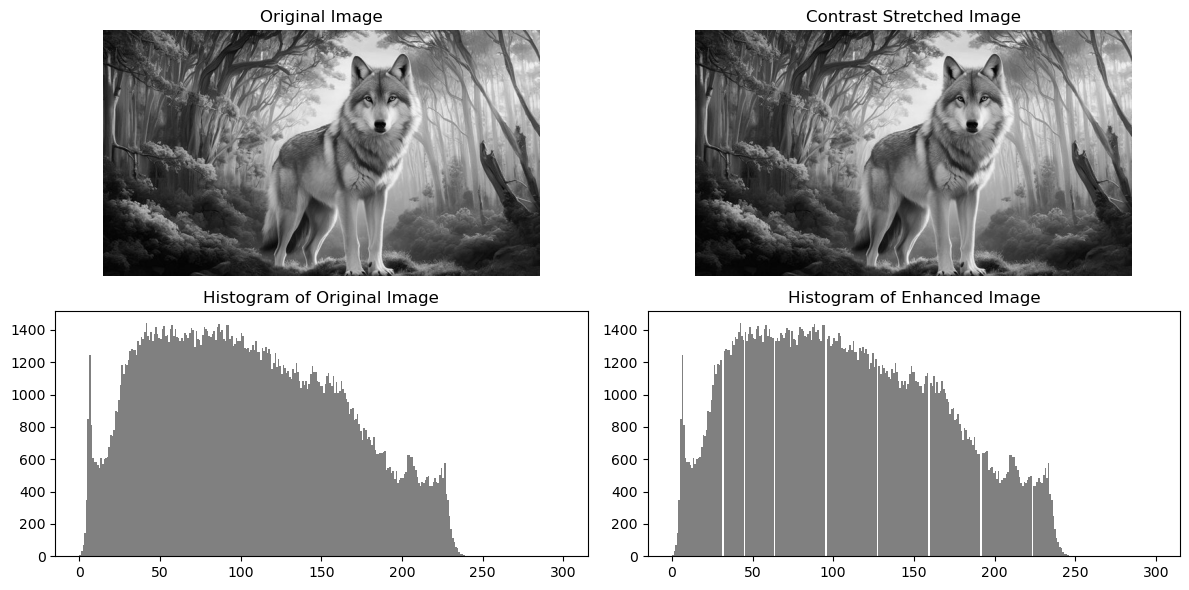

In [19]:
# Write a function named ‘constrastStretch’ to stretch the contrast of an image.

def contrastStretch(image):
    r_min = np.min(image)
    r_max = np.max(image)

    stretched_image = (image - r_min) * (255 / (r_max - r_min))
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.imshow(stretched_image, cmap = 'gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    plt.hist(image.flatten(), bins = 300, range = [0, 300], color = 'gray')
    plt.title('Histogram of Original Image')
    
    plt.subplot(2, 2, 4)
    plt.hist(stretched_image.flatten(), bins = 300, range = [0, 300], color = 'gray')
    plt.title('Histogram of Enhanced Image')
    plt.tight_layout()
    plt.show()

image = cv2.imread('2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
contrastStretch(image)